Block 76: 638 burned pixels


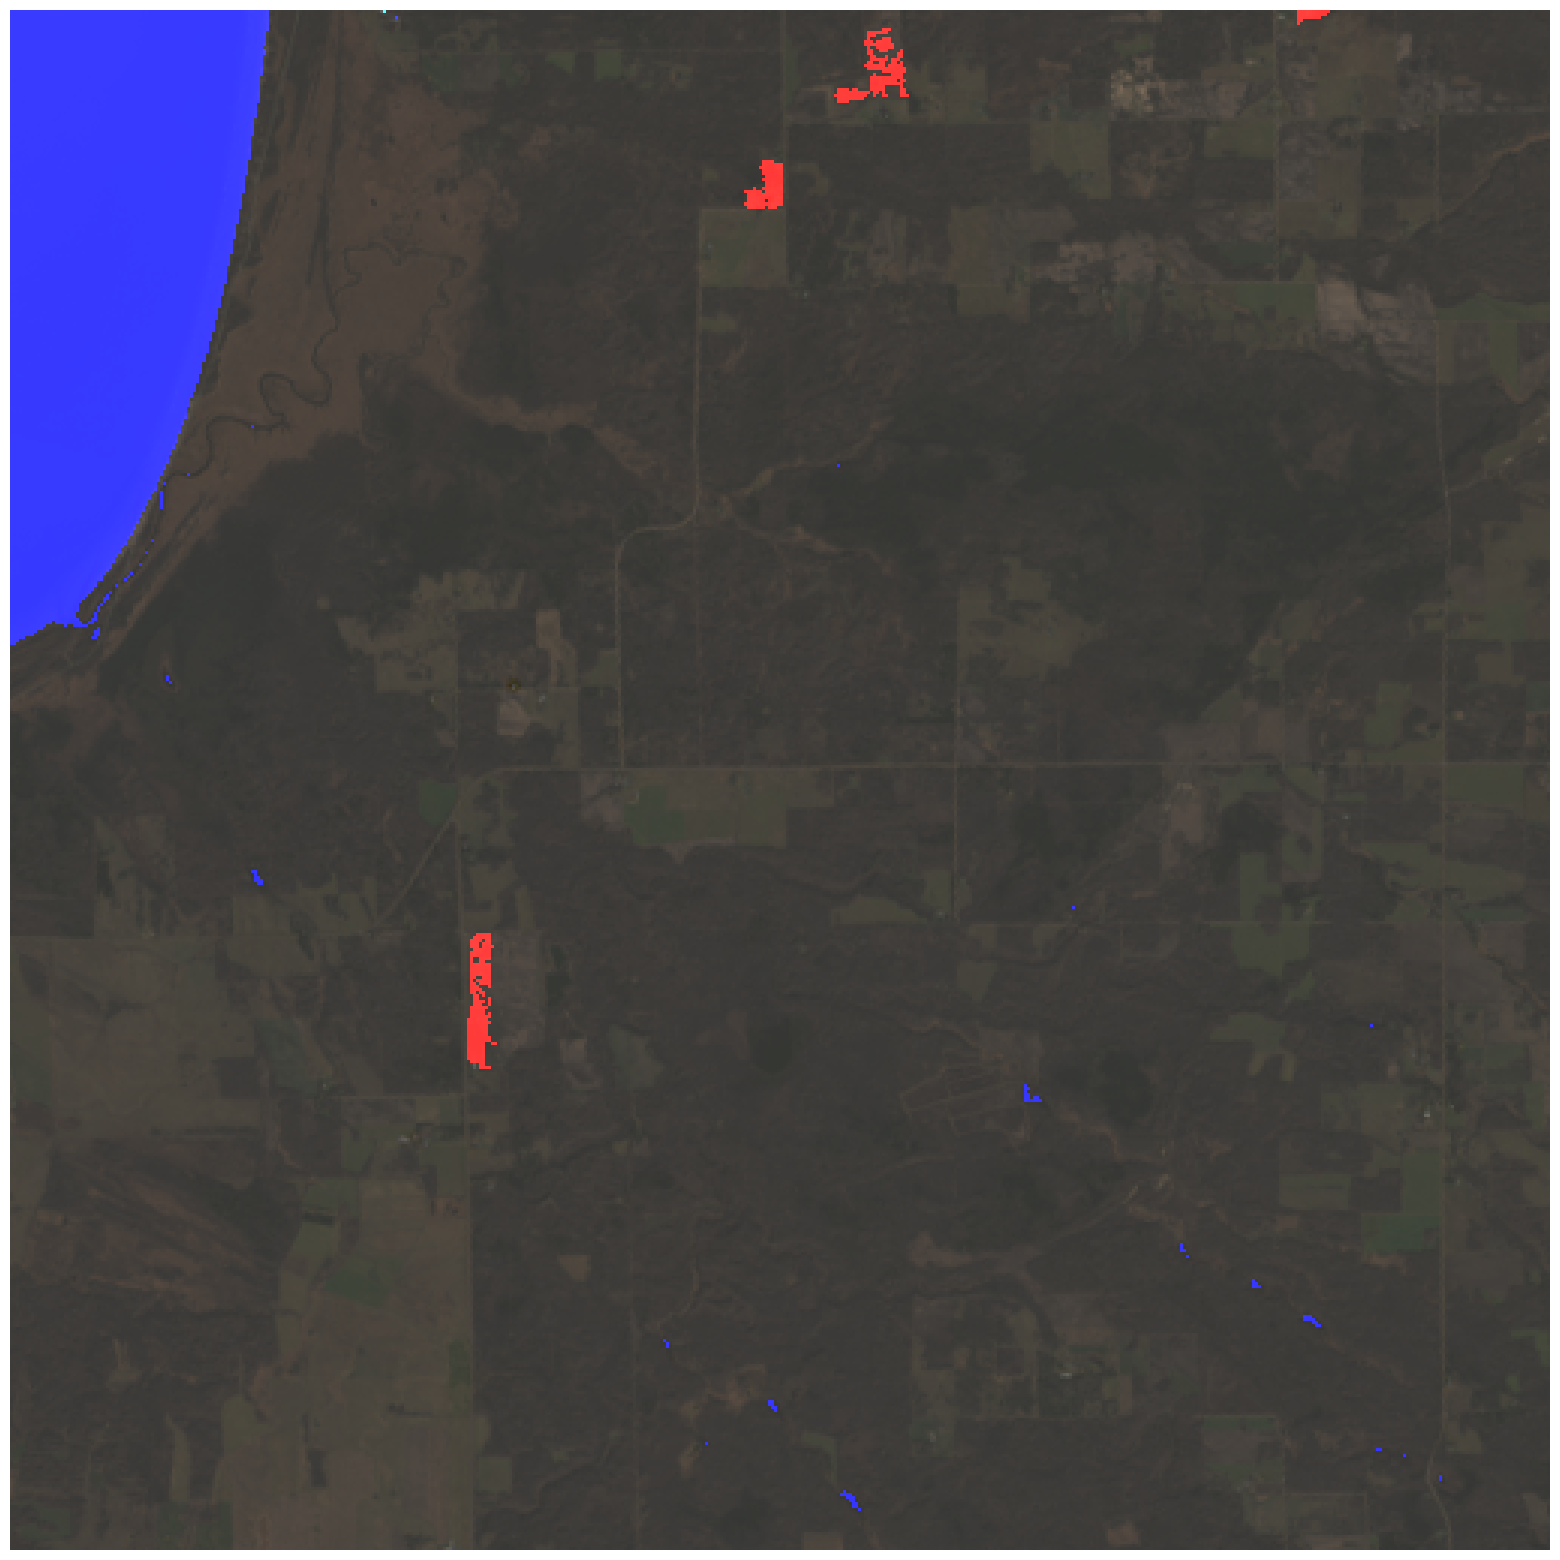

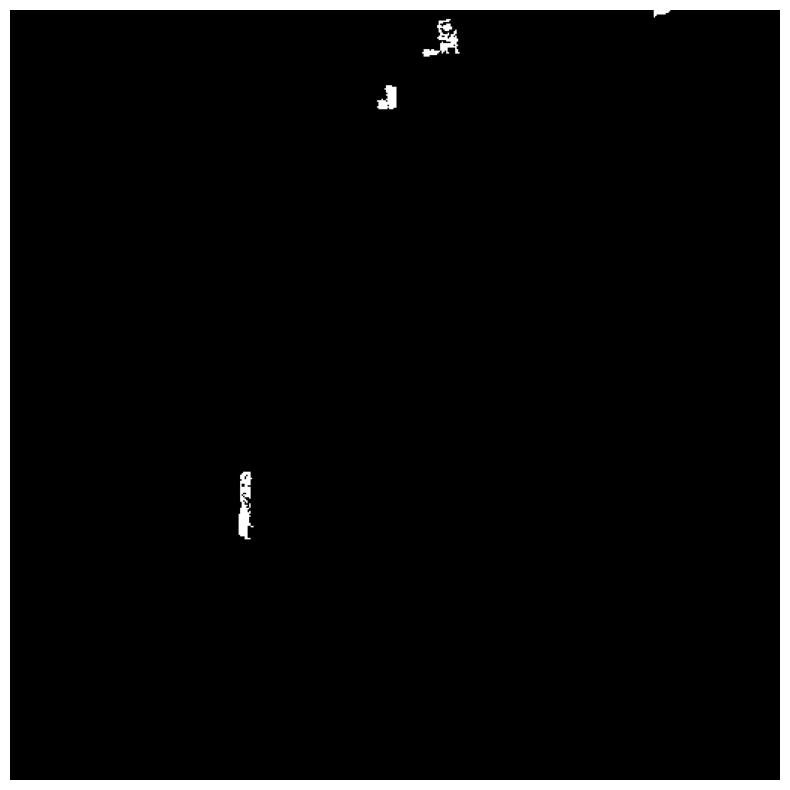

Block 527: 587 burned pixels


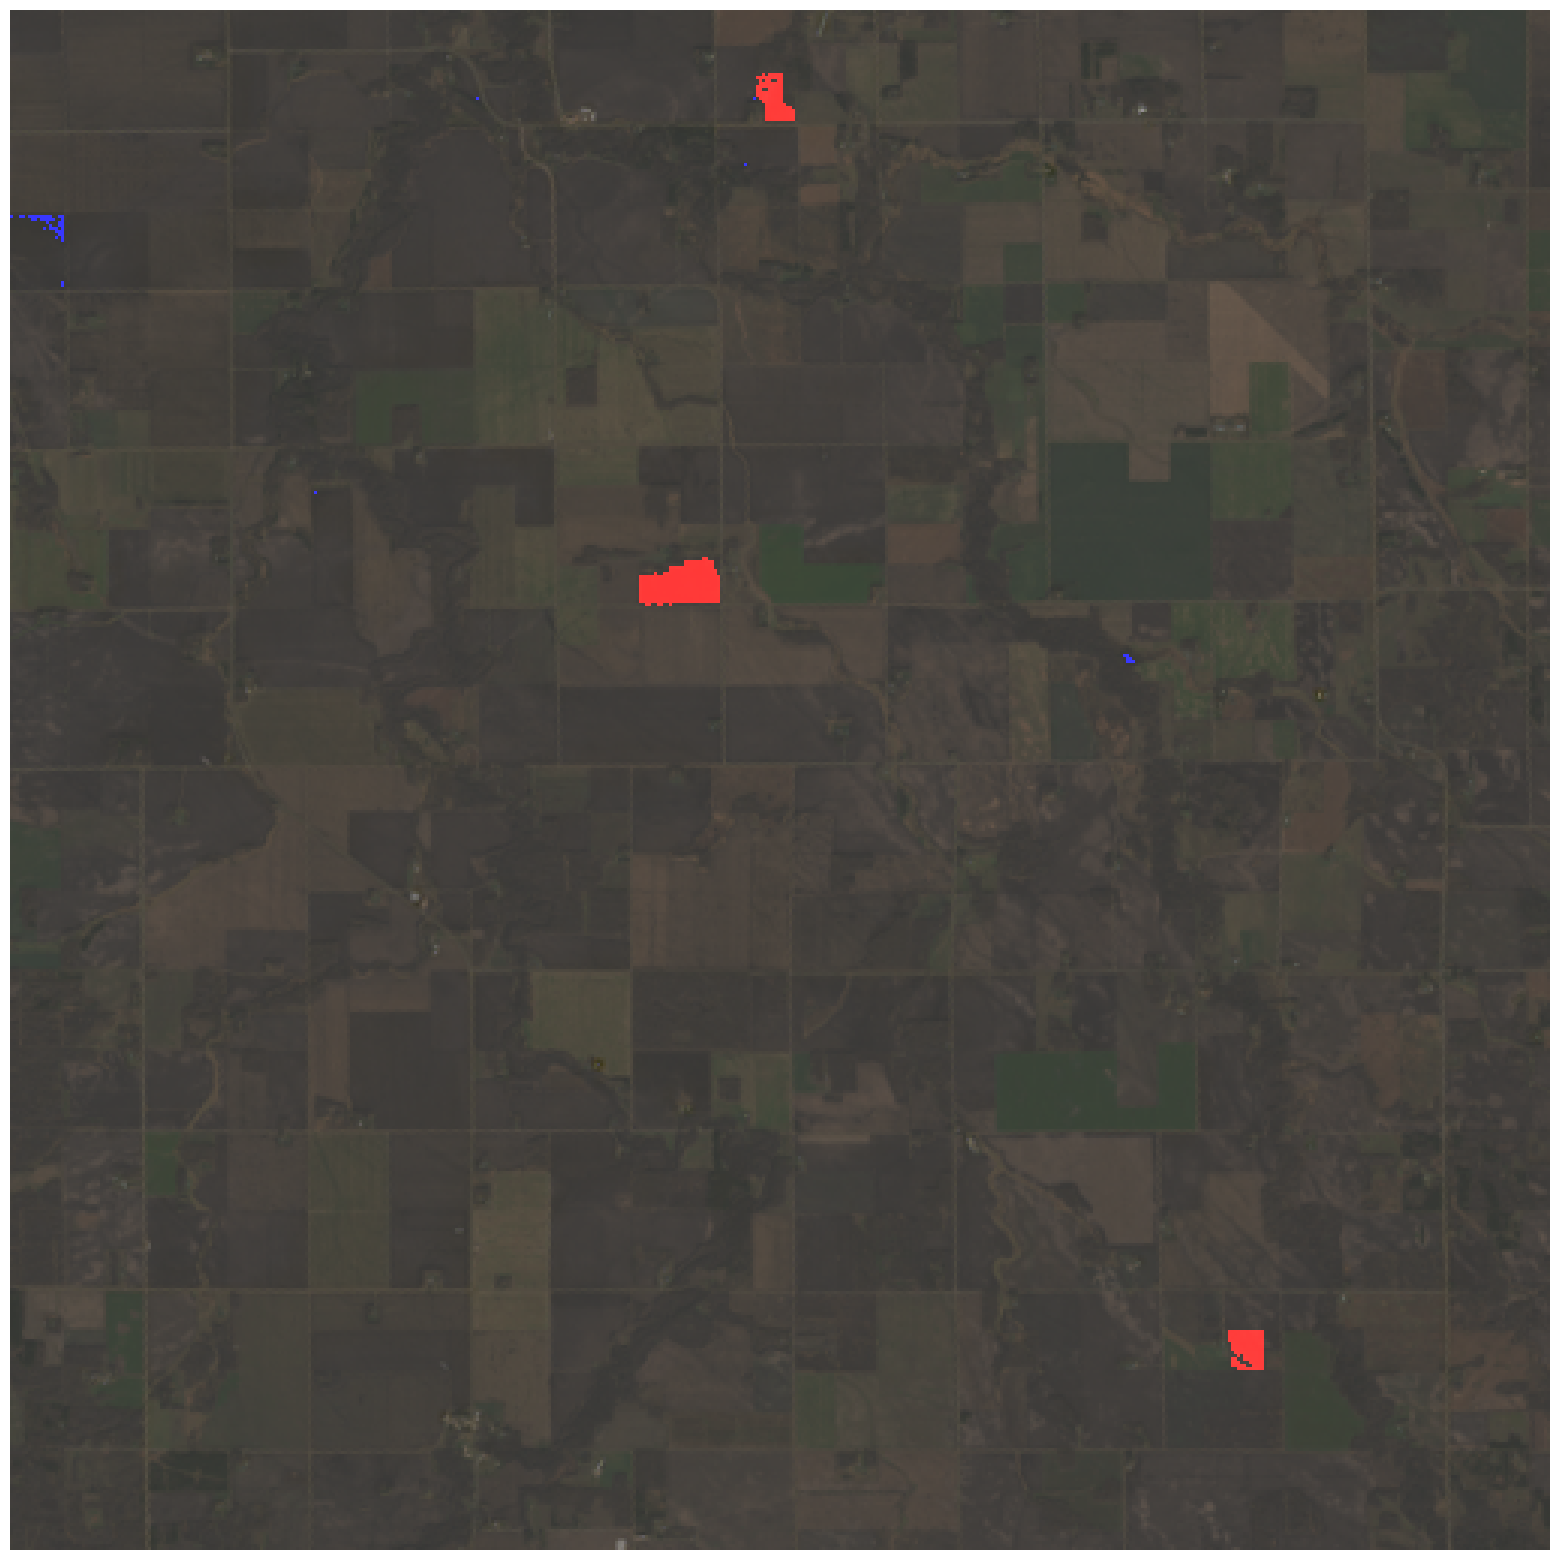

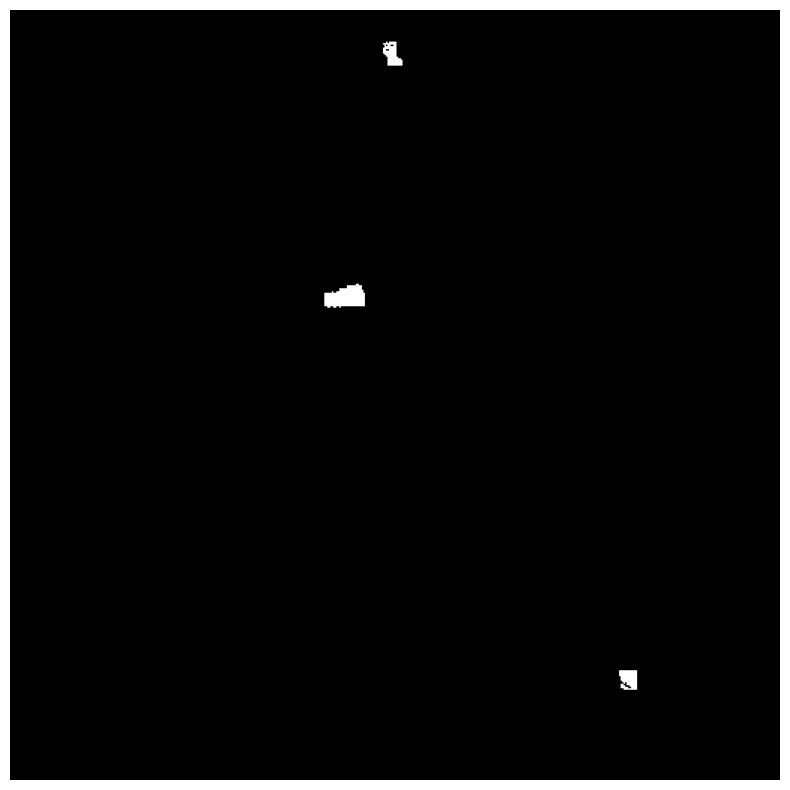

In [2]:
import os
import numpy as np

from lib.debug import *

np.random.seed(42) # The Key To The Universe

# Load blocks from data folder
data_dir = "./data/"
rgb_blocks = []
mask_blocks = []
for block_path in os.listdir(data_dir):
    # Skip if not the correct file type
    if not block_path.endswith(".npz"):
        continue

    # Load the data and assign to the correct list
    data = np.load(os.path.join(data_dir, block_path))
    rgb_blocks.append(data["rgb"])
    mask_blocks.append(data["mask"])


# Example: Analyze burned area in each block
burned_area_per_block = [np.sum(block == 1) for block in mask_blocks]

# Select 15 random blocks
block_indices = np.arange(len(mask_blocks))
random_indices = np.random.choice(block_indices, size=15, replace=False)

# Print the results and show blocks with burned areas
for idx in random_indices:
    burned_pixels = burned_area_per_block[idx]
    if burned_pixels > 0:
        print(f"Block {idx}: {burned_pixels} burned pixels")
        plot_highlighted_rgb_and_mask(rgb_blocks[idx], mask_blocks[idx])
        plot_burned_area_mask(mask_blocks[idx])

# Metric Examples
- Intersection over Union (IoU)
- Dice Coefficent
- Pixel Accuracy

In [2]:
# Metric Preperation
import torch
from lib.data import remove_filler_values

clean_mask_blocks = []

for block in mask_blocks:
    mask = remove_filler_values(block)
    mask[mask == 255] = 0 # Ignoring fill values
    clean_mask_blocks.append(mask)

mask_tensors = torch.tensor(np.stack(mask_blocks))

# Generate mock predicted masks (random binary masks)
predicted_tensors = torch.randint(0, 2, mask_tensors.shape)

In [3]:
# IOU
from lib.metrics.iou import iou

iou_scores = iou(mask_tensors, predicted_tensors)
print(f"Example IoU - index 44: {iou_scores[44].item():.4f}")

Example IoU - index 44: 0.0168


In [4]:
# Dice Coefficient
from lib.metrics.dice import dice_coefficient

# Compute Dice coefficient for the batch
dice_scores = dice_coefficient(mask_tensors, predicted_tensors)
print(f"Example Dice Coefficient - index 44: {dice_scores[44].item():.4f}")

Example Dice Coefficient - index 44: 0.0330


In [5]:
from lib.metrics.accuracy import pixel_accuracy

pixel_accuracies = pixel_accuracy(mask_tensors, predicted_tensors)
print(f"Example Pixel Accuracy - index 44: {pixel_accuracies[43].item():.4f}")

Example Pixel Accuracy - index 44: 0.5001
